# Data Wrangling I

Perform the following operations using Python on any open source dataset (e.g., data.csv) 
    1. Import all the required Python Libraries. 
    2. Locate an open source data from the web (e.g. https://www.kaggle.com). Provide a clear  description of   the data and its source (i.e., URL of the web site). 
    3. Load the Dataset into pandas data frame. 
    4. Data Preprocessing: check for missing values in the data using pandas insult(), describe() function  to  get  some  initial  statistics.  Provide  variable  descriptions.  Types  of  variables etc. Check the     dimensions of the data frame. 
    5. Data Formatting and Data Normalization: Summarize the types of variables by checking the data types   (i.e., character, numeric, integer, factor, and logical) of the variables in the data set. If variables are not in the correct data type, apply proper type conversions. 
    6. Turn categorical variables into quantitative variables in Python. 
In addition to the codes and outputs, explain every operation that you do in the above steps and explain everything that you do to import/read/scrape the data set.

## Importing Required Libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## Loading the Dataset

In [2]:
df = pd.read_csv("/home/student/Documents/31170/A1/exams.csv")

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67.0,67.0,63.0
1,female,group D,some high school,free/reduced,none,40.0,59.0,55.0
2,male,group E,some college,free/reduced,none,59.0,60.0,50.0
3,male,group B,high school,standard,none,77.0,78.0,68.0
4,male,group E,associate's degree,standard,completed,NaN,73.0,68.0


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73.0,70.0,65.0
996,male,group D,associate's degree,free/reduced,completed,85.0,NaN,92.0
997,female,group C,some high school,free/reduced,none,32.0,35.0,41.0
998,female,group C,some college,standard,none,73.0,74.0,82.0
999,male,group A,some college,standard,completed,65.0,60.0,62.0


In [ ]:
Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      998 non-null    object 
 5   math score                   988 non-null    float64
 6   reading score                987 non-null    float64
 7   writing score                985 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         2
math score                     12
reading score                  13
writing score                  15
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,988.000000,987.000000,985.000000
mean,66.441296,69.027356,67.815228
std,15.433736,14.753631,15.532040
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [9]:
mean_val = df['math score'].mean()

In [10]:
df['math score'].fillna((df['math score'].mean()), inplace=True)

In [11]:
mean_val = df['reading score'].mean()

In [12]:
df['reading score'].fillna((df['reading score'].mean()), inplace=True)

In [13]:
mean_val = df['writing score'].mean()

In [14]:
df['writing score'].fillna((df['writing score'].mean()), inplace=True)

In [15]:
df['test preparation course'].fillna(df['test preparation course'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
df2 = df.iloc[:,[5,6,7]]

In [18]:
scaler = MinMaxScaler()

In [19]:
df2 = scaler.fit_transform(df2)

In [20]:
df2

array([[0.62068966, 0.54794521, 0.51948052],
       [0.31034483, 0.43835616, 0.41558442],
       [0.52873563, 0.45205479, 0.35064935],
       ...,
       [0.2183908 , 0.10958904, 0.23376623],
       [0.68965517, 0.64383562, 0.76623377],
       [0.59770115, 0.45205479, 0.50649351]])

In [21]:
df.iloc[:,[5,6,7]] = df2

In [22]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,0.620690,0.547945,0.519481
1,female,group D,some high school,free/reduced,none,0.310345,0.438356,0.415584
2,male,group E,some college,free/reduced,none,0.528736,0.452055,0.350649
3,male,group B,high school,standard,none,0.735632,0.698630,0.584416
4,male,group E,associate's degree,standard,completed,0.614268,0.630137,0.584416
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,0.689655,0.589041,0.545455
996,male,group D,associate's degree,free/reduced,completed,0.827586,0.575717,0.896104
997,female,group C,some high school,free/reduced,none,0.218391,0.109589,0.233766
998,female,group C,some college,standard,none,0.689655,0.643836,0.766234


In [23]:
le = LabelEncoder()

In [24]:
df['gender'] = le.fit_transform(df['gender'])

In [25]:
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

In [26]:
df['parental level of education'] = le.fit_transform(df['parental level of education'])

In [27]:
df['lunch'] = le.fit_transform(df['lunch'])

In [28]:
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [29]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,0.620690,0.547945,0.519481
1,0,3,5,0,1,0.310345,0.438356,0.415584
2,1,4,4,0,1,0.528736,0.452055,0.350649
3,1,1,2,1,1,0.735632,0.698630,0.584416
4,1,4,0,1,0,0.614268,0.630137,0.584416
...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,0.689655,0.589041,0.545455
996,1,3,0,0,0,0.827586,0.575717,0.896104
997,0,2,5,0,1,0.218391,0.109589,0.233766
998,0,2,4,1,1,0.689655,0.643836,0.766234


In [30]:
print(df.dtypes)

gender                           int64
race/ethnicity                   int64
parental level of education      int64
lunch                            int64
test preparation course          int64
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


In [31]:
#df['reading score'].astype(int) to perform type casting

<AxesSubplot:xlabel='race/ethnicity'>

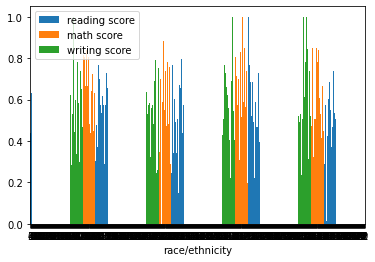

In [32]:
df.plot(x = 'race/ethnicity', y = ['reading score', 'math score', 'writing score'], kind = 'bar', rot=0)